In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2],[1.5,1.8],[5,8],[7,8],[1,0.6],[9,11],[2,2],[6,6],[10,11],[11,10]])

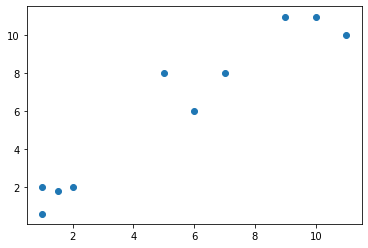

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [20]:
def fit(data,k=2,max_iter = 100):
    means = []
    #randomly initialise the means
    for i in range(k):
        means.append(data[i])
    for i in range(max_iter):
        #assign data points to cluster they belong to
        #create empty clusters
        clusters =[]
        for j in range(k):
            clusters.append([])
        for point in data:
            #find distance to all mean values
            distances = [((point-m)**2).sum() for m in means]
            #find min distance
            minDistance = min(distances)
            #find mean for which we got min disatnce->l
            l = distances.index(minDistance)
            #add this point to cluster l
            clusters[l].append(point)
            
        #calculate new mean value
        change = False
        for j in range(k):
            new_mean = np.average(clusters[j],axis = 0)
            if not np.array_equal(means[j],new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
    return means

In [23]:
def predict(test_data,means):
    predictions = []
    for point in test_data:
        #find distance to all mean values
        distances = [((point-m)**2).sum() for m in means]
        #find min distance
        minDistance = min(distances)
        #find mean for which we got min disatnce->l
        l = distances.index(minDistance)
        #add this point to cluster l
        predictions.append(l)
    return predictions

In [24]:
means = fit(X,2)

In [25]:
predict(X,means)

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1]

In [37]:
class K_Means:
    
    def __init__(self,k=2,max_iter=100):
        print("constructor")
        self.k=k
        self.max_iter = max_iter
        
    def fit(self,data,k=2,max_iter = 100):
        self.means = []
        #randomly initialise the means
        for i in range(k):
            self.means.append(data[i])
        for i in range(max_iter):
            #assign data points to cluster they belong to
            #create empty clusters
            clusters =[]
            for j in range(k):
                clusters.append([])
            for point in data:
                #find distance to all mean values
                distances = [((point-m)**2).sum() for m in self.means]
                #find min distance
                minDistance = min(distances)
                #find mean for which we got min disatnce->l
                l = distances.index(minDistance)
                #add this point to cluster l
                clusters[l].append(point)
            
            #calculate new mean value
            change = False
            for j in range(k):
                new_mean = np.average(clusters[j],axis = 0)
                if not np.array_equal(self.means[j],new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self,test_data):
        predictions = []
        for point in test_data:
            #find distance to all mean values
            distances = [((point-m)**2).sum() for m in self.means]
            #find min distance
            minDistance = min(distances)
            #find mean for which we got min disatnce->l
            l = distances.index(minDistance)
            #add this point to cluster l
            predictions.append(l)
        return predictions

In [38]:
kmeans = K_Means()

constructor


In [39]:
kmeans.fit(X)

In [40]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1]